# Internet Movie Database (IMDb)


Project Description: Predicting the IMDb rating of a movie by building a regression model on IMDb dataset 

In [1]:
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt
%matplotlib inline 

Loading the data set

In [2]:
IMDb_dataset = pd.read_csv("/Users/Sahil/Documents/masters/ml_project/movie_metadata.csv")

Displaying the data set

In [3]:
IMDb_dataset.info

<bound method DataFrame.info of                  color       director_name  num_critic_for_reviews  duration  \
0                Color       James Cameron                   723.0     178.0   
1                Color      Gore Verbinski                   302.0     169.0   
2                Color          Sam Mendes                   602.0     148.0   
3                Color   Christopher Nolan                   813.0     164.0   
4                  NaN         Doug Walker                     NaN       NaN   
5                Color      Andrew Stanton                   462.0     132.0   
6                Color           Sam Raimi                   392.0     156.0   
7                Color        Nathan Greno                   324.0     100.0   
8                Color         Joss Whedon                   635.0     141.0   
9                Color         David Yates                   375.0     153.0   
10               Color         Zack Snyder                   673.0     183.0   
11      

Displaying the number of instances and features before modification

In [4]:
IMDb_dataset.shape

(5043, 28)

Deleting the unnecessary features

In [5]:
del IMDb_dataset['director_name']
del IMDb_dataset['aspect_ratio']
del IMDb_dataset['movie_imdb_link']
del IMDb_dataset['title_year']
del IMDb_dataset['actor_1_name']
del IMDb_dataset['actor_2_name']
del IMDb_dataset['actor_3_name']
del IMDb_dataset['gross']
del IMDb_dataset['plot_keywords']
del IMDb_dataset['movie_title']
del IMDb_dataset['cast_total_facebook_likes']
del IMDb_dataset['budget']
del IMDb_dataset['facenumber_in_poster']

Displaying features and features' type before modification

In [6]:
IMDb_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 15 columns):
color                      5024 non-null object
num_critic_for_reviews     4993 non-null float64
duration                   5028 non-null float64
director_facebook_likes    4939 non-null float64
actor_3_facebook_likes     5020 non-null float64
actor_1_facebook_likes     5036 non-null float64
genres                     5043 non-null object
num_voted_users            5043 non-null int64
num_user_for_reviews       5022 non-null float64
language                   5031 non-null object
country                    5038 non-null object
content_rating             4740 non-null object
actor_2_facebook_likes     5030 non-null float64
imdb_score                 5043 non-null float64
movie_facebook_likes       5043 non-null int64
dtypes: float64(8), int64(2), object(5)
memory usage: 591.1+ KB


Filling the missing values for all the features with their respective mean

In [7]:
for i in IMDb_dataset:
    if(IMDb_dataset[i].dtypes != object):
        IMDb_dataset[i].fillna(IMDb_dataset[i].mean(), inplace = True)

Binarizing the categorical feature 'genres'

In [8]:
Adventure = []
Action = []
Drama = []
Fantasy = []
Romance = []
Comedy = []
Family = []
Musical = []
History = []
War = []
Documentary = []
Sport = []
Crime = []
Horror = []
Mystery = []
Sci_Fi = []
Thriller = []
Animation = []
Biography = []
for i in IMDb_dataset['genres']:
    if 'Adventure' in i:
        Adventure.append(1)
    else:
        Adventure.append(0)
    if 'Action' in i:
        Action.append(1)
    else:
        Action.append(0)
    if 'Drama' in i:
        Drama.append(1)
    else:
        Drama.append(0)
    if 'Fantasy' in i:
        Fantasy.append(1)
    else:
        Fantasy.append(0)
    if 'Romance' in i:
        Romance.append(1)
    else:
        Romance.append(0)
    if 'Comedy' in i:
        Comedy.append(1)
    else:
        Comedy.append(0)
    if 'Family' in i:
        Family.append(1)
    else:
        Family.append(0)
    if 'Musical' in i:
        Musical.append(1)
    else:
        Musical.append(0)
    if 'History' in i:
        History.append(1)
    else:
        History.append(0)
    if 'War' in i:
        War.append(1)
    else:
        War.append(0)
    if 'Documentary' in i:
        Documentary.append(1)
    else:
        Documentary.append(0)
    if 'Sport' in i:
        Sport.append(1)
    else:
        Sport.append(0)
    if 'Crime' in i:
        Crime.append(1)
    else:
        Crime.append(0)
    if 'Horror' in i:
        Horror.append(1)
    else:
        Horror.append(0)
    if 'Mystery' in i:
        Mystery.append(1)
    else:
        Mystery.append(0)
    if 'Sci-Fi' in i:
        Sci_Fi.append(1)
    else:
        Sci_Fi.append(0)
    if 'Thriller' in i:
        Thriller.append(1)
    else:
        Thriller.append(0)
    if 'Animation' in i:
        Animation.append(1)
    else:
        Animation.append(0)
    if 'Biography' in i:
        Biography.append(1)
    else:
        Biography.append(0)    

Appending the following features to the data set

In [9]:
IMDb_dataset['Adventure']=Adventure
IMDb_dataset['Action']=Action
IMDb_dataset['Drama']= Drama
IMDb_dataset['Fantasy']= Fantasy
IMDb_dataset['Romance']=Romance
IMDb_dataset['Comedy']=Comedy
IMDb_dataset['Family']=Family
IMDb_dataset['Musical']=Musical
IMDb_dataset['History']=History
IMDb_dataset['War']=War
IMDb_dataset['Documentary']=Documentary
IMDb_dataset['Sport']=Sport
IMDb_dataset['Crime']=Crime
IMDb_dataset['Horror']=Horror
IMDb_dataset['Mystery']=Mystery
IMDb_dataset['Sci_Fi']=Sci_Fi
IMDb_dataset['Thriller']=Thriller
IMDb_dataset['Animation']=Animation
IMDb_dataset['Biography']=Biography

Filling the missing values for the feature 'content_rating' with its respective mode value

In [10]:
IMDb_dataset['content_rating'].fillna('R',inplace=True)

Deleting instances containing null values for the following categorical features  

In [11]:
IMDb_dataset = IMDb_dataset[IMDb_dataset.country.notnull()]
IMDb_dataset = IMDb_dataset[IMDb_dataset.language.notnull()]
IMDb_dataset = IMDb_dataset[IMDb_dataset.color.notnull()]

Deleting 'genres' feature

In [12]:
del IMDb_dataset['genres']

Displaying the number instances and features after modification

In [13]:
IMDb_dataset.shape

(5015, 33)

Displaying features and features' type after modification

In [14]:
IMDb_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5015 entries, 0 to 5042
Data columns (total 33 columns):
color                      5015 non-null object
num_critic_for_reviews     5015 non-null float64
duration                   5015 non-null float64
director_facebook_likes    5015 non-null float64
actor_3_facebook_likes     5015 non-null float64
actor_1_facebook_likes     5015 non-null float64
num_voted_users            5015 non-null int64
num_user_for_reviews       5015 non-null float64
language                   5015 non-null object
country                    5015 non-null object
content_rating             5015 non-null object
actor_2_facebook_likes     5015 non-null float64
imdb_score                 5015 non-null float64
movie_facebook_likes       5015 non-null int64
Adventure                  5015 non-null int64
Action                     5015 non-null int64
Drama                      5015 non-null int64
Fantasy                    5015 non-null int64
Romance                    

Displaying histogram for the Target Variable i.e. 'imdb_score', which is numerical

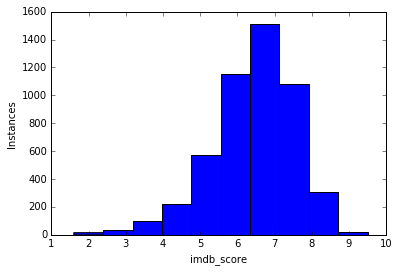

In [15]:
plt.hist(IMDb_dataset.imdb_score)
plt.xlabel('imdb_score')
plt.ylabel('Instances')
plt.show()

Calculating mean and variance for the Target Variable i.e. 'imdb_score', which is numerical

In [16]:
mean=IMDb_dataset['imdb_score'].mean()
var=IMDb_dataset['imdb_score'].var()
print('mean: %f'%mean)
print('var: %f'%var)

mean: 6.443051
var: 1.261208


Displaying box plot for the Target Variable i.e. 'imdb_score', which is numerical

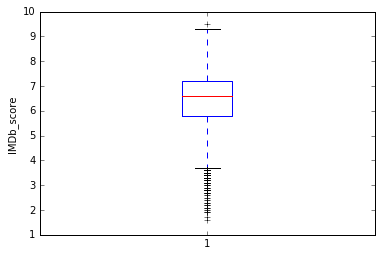

In [17]:
plt.boxplot(IMDb_dataset['imdb_score'])
plt.ylabel('IMDb_score')
plt.show()

Displaying bar plot for categorial feature 'color'

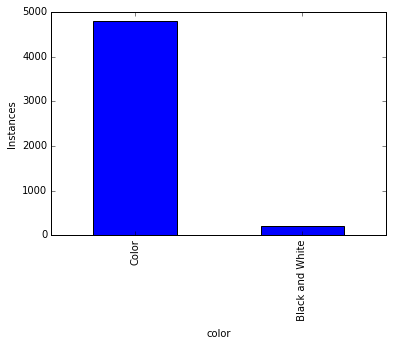

In [18]:
IMDb_dataset.color.value_counts().plot(kind='bar')
plt.xlabel('color')
plt.ylabel('Instances')
plt.show()

Displaying bar plot for categorial feature 'language'

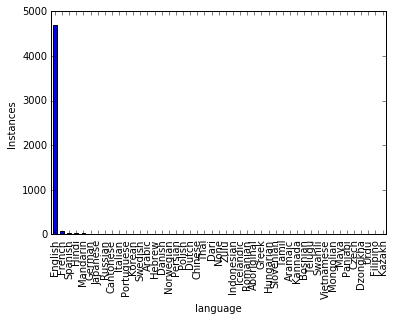

In [19]:
IMDb_dataset.language.value_counts().plot(kind='bar')
plt.xlabel('language')
plt.ylabel('Instances')
plt.show()

Displaying bar plot for categorial feature 'country'

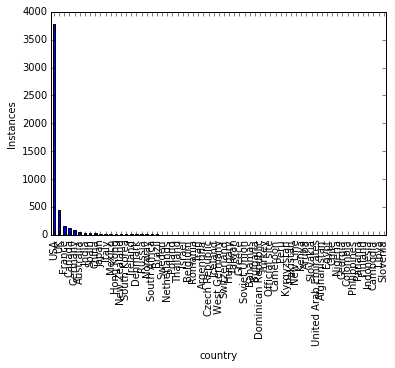

In [20]:
IMDb_dataset.country.value_counts().plot(kind='bar')
plt.xlabel('country')
plt.ylabel('Instances')
plt.show()

Displaying bar plot for categorial feature 'content_rating'

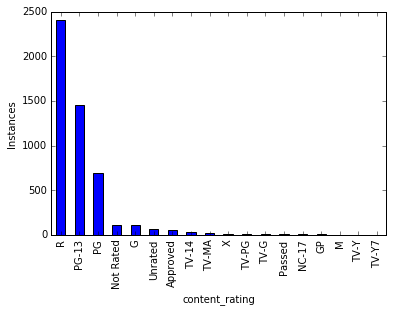

In [21]:
IMDb_dataset.content_rating.value_counts().plot(kind='bar')
plt.xlabel('content_rating')
plt.ylabel('Instances')
plt.show()

Displaying histogram for numerical feature 'num_critic_for_reviews'

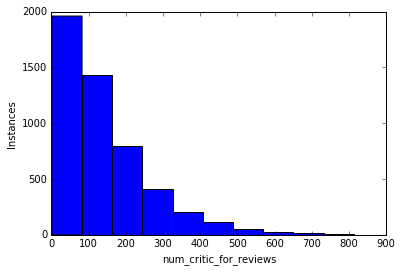

In [22]:
plt.hist(IMDb_dataset.num_critic_for_reviews)
plt.xlabel('num_critic_for_reviews')
plt.ylabel('Instances')
plt.show()

Displaying statistics for numerical feature 'num_critic_for_reviews'

In [23]:
mean=IMDb_dataset['num_critic_for_reviews'].mean()
var=IMDb_dataset['num_critic_for_reviews'].var()
std=IMDb_dataset['num_critic_for_reviews'].std()
print('mean: %f'%mean)
print('var: %f'%var)
print('std: %f'%std)

mean: 140.716637
var: 14658.202869
std: 121.071065


Displaying histogram for numerical feature 'duration'

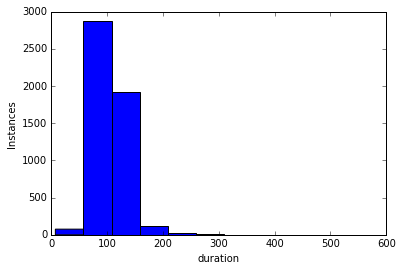

In [24]:
plt.hist(IMDb_dataset.duration)
plt.xlabel('duration')
plt.ylabel('Instances')
plt.show()

Displaying statistics for numerical feature 'duration'

In [25]:
mean=IMDb_dataset['duration'].mean()
var=IMDb_dataset['duration'].var()
std=IMDb_dataset['duration'].std()
print('mean: %f'%mean)
print('var: %f'%var)
print('std: %f'%std)

mean: 107.281120
var: 630.823542
std: 25.116201


Displaying histogram for numerical feature 'director_facebook_likes'

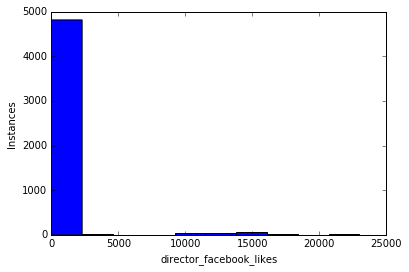

In [26]:
plt.hist(IMDb_dataset.director_facebook_likes)
plt.xlabel('director_facebook_likes')
plt.ylabel('Instances')
plt.show()

Displaying statistics for numerical feature 'director_facebook_likes'

In [27]:
mean=IMDb_dataset['director_facebook_likes'].mean()
var=IMDb_dataset['director_facebook_likes'].var()
std=IMDb_dataset['director_facebook_likes'].std()
print('mean: %f'%mean)
print('var: %f'%var)
print('std: %f'%std)

mean: 689.367083
var: 7793034.295299
std: 2791.600669


Displaying histogram for numerical feature 'actor_3_facebook_likes'

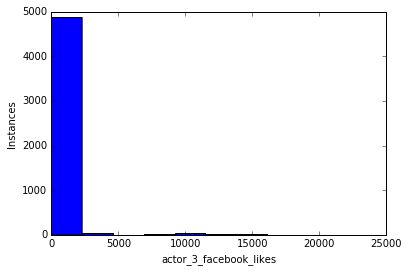

In [28]:
plt.hist(IMDb_dataset.actor_3_facebook_likes)
plt.xlabel('actor_3_facebook_likes')
plt.ylabel('Instances')
plt.show()

Displaying statistics for numerical feature 'actor_3_facebook_likes'

In [29]:
mean=IMDb_dataset['actor_3_facebook_likes'].mean()
var=IMDb_dataset['actor_3_facebook_likes'].var()
std=IMDb_dataset['actor_3_facebook_likes'].std()
print('mean: %f'%mean)
print('var: %f'%var)
print('std: %f'%std)

mean: 646.683391
var: 2774181.398179
std: 1665.587403


Displaying histogram for numerical feature 'actor_1_facebook_likes'

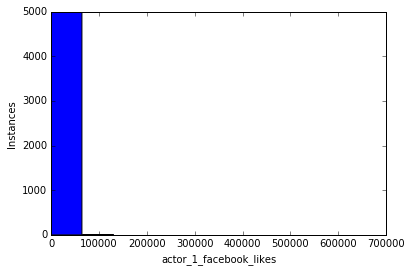

In [30]:
plt.hist(IMDb_dataset.actor_1_facebook_likes)
plt.xlabel('actor_1_facebook_likes')
plt.ylabel('Instances')
plt.show()

Displaying statistics for numerical feature 'actor_1_facebook_likes'

In [31]:
mean=IMDb_dataset['actor_1_facebook_likes'].mean()
var=IMDb_dataset['actor_1_facebook_likes'].var()
std=IMDb_dataset['actor_1_facebook_likes'].std()
print('mean: %f'%mean)
print('var: %f'%var)
print('std: %f'%std)

mean: 6537.600265
var: 213557514.079412
std: 14613.607155


Displaying histogram for numerical feature 'num_voted_users'

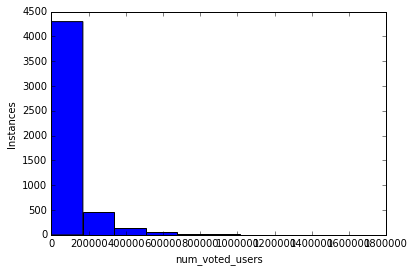

In [32]:
plt.hist(IMDb_dataset.num_voted_users)
plt.xlabel('num_voted_users')
plt.ylabel('Instances')
plt.show()

Displaying statistics for numerical feature 'num_voted_users'

In [33]:
mean=IMDb_dataset['num_voted_users'].mean()
var=IMDb_dataset['num_voted_users'].var()
std=IMDb_dataset['num_voted_users'].std()
print('mean: %f'%mean)
print('var: %f'%var)
print('std: %f'%std)

mean: 84051.547956
var: 19248543288.008369
std: 138739.119530


Displaying histogram for numerical feature 'num_user_for_reviews'

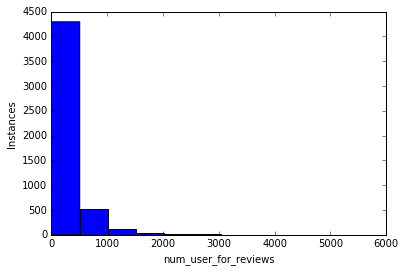

In [34]:
plt.hist(IMDb_dataset.num_user_for_reviews)
plt.xlabel('num_user_for_reviews')
plt.ylabel('Instances')
plt.show()

Displaying statistics for numerical feature 'num_user_for_reviews'

In [35]:
mean=IMDb_dataset['num_user_for_reviews'].mean()
var=IMDb_dataset['num_user_for_reviews'].var()
std=IMDb_dataset['num_user_for_reviews'].std()
print('mean: %f'%mean)
print('var: %f'%var)
print('std: %f'%std)

mean: 273.876346
var: 142790.769548
std: 377.876659


Displaying histogram for numerical feature 'actor_2_facebook_likes'

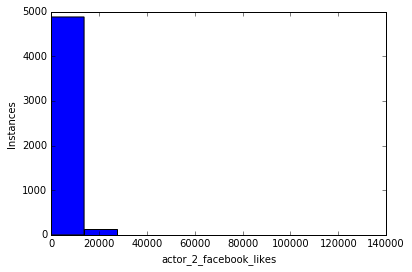

In [36]:
plt.hist(IMDb_dataset.actor_2_facebook_likes)
plt.xlabel('actor_2_facebook_likes')
plt.ylabel('Instances')
plt.show()

Displaying statistics for numerical feature 'actor_2_facebook_likes'

In [37]:
mean=IMDb_dataset['actor_2_facebook_likes'].mean()
var=IMDb_dataset['actor_2_facebook_likes'].var()
std=IMDb_dataset['actor_2_facebook_likes'].std()
print('mean: %f'%mean)
print('var: %f'%var)
print('std: %f'%std)

mean: 1658.188445
var: 16381470.569603
std: 4047.402941


Displaying histogram for numerical feature 'movie_facebook_likes'

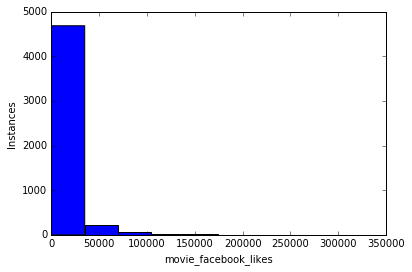

In [38]:
plt.hist(IMDb_dataset.movie_facebook_likes)
plt.xlabel('movie_facebook_likes')
plt.ylabel('Instances')
plt.show()

Displaying statistics for numerical feature 'movie_facebook_likes'

In [39]:
mean=IMDb_dataset['movie_facebook_likes'].mean()
var=IMDb_dataset['movie_facebook_likes'].var()
std=IMDb_dataset['movie_facebook_likes'].std()
print('mean: %f'%mean)
print('var: %f'%var)
print('std: %f'%std)

mean: 7549.672981
var: 374615402.369679
std: 19354.983916


Displaying histogram for feature 'Adventure'

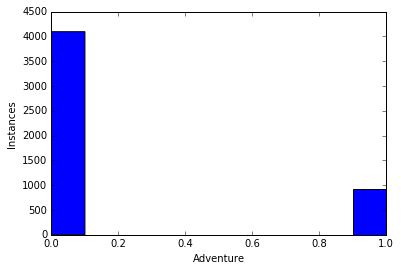

In [40]:
plt.hist(IMDb_dataset.Adventure)
plt.xlabel('Adventure')
plt.ylabel('Instances')
plt.show()

Displaying statistics for feature 'Adventure'

In [41]:
mean=IMDb_dataset['Adventure'].mean()
var=IMDb_dataset['Adventure'].var()
std=IMDb_dataset['Adventure'].std()
print('mean: %f'%mean)
print('var: %f'%var)
print('std: %f'%std)

mean: 0.183450
var: 0.149826
std: 0.387073


Displaying statistics for feature 'Action'

In [42]:
mean=IMDb_dataset['Action'].mean()
var=IMDb_dataset['Action'].var()
std=IMDb_dataset['Action'].std()
print('mean: %f'%mean)
print('var: %f'%var)
print('std: %f'%std)

mean: 0.228714
var: 0.176439
std: 0.420046


Displaying statistics for feature 'Drama'

In [43]:
mean=IMDb_dataset['Drama'].mean()
var=IMDb_dataset['Drama'].var()
std=IMDb_dataset['Drama'].std()
print('mean: %f'%mean)
print('var: %f'%var)
print('std: %f'%std)

mean: 0.513260
var: 0.249874
std: 0.499874


Displaying statistics for feature 'Fantasy'

In [44]:
mean=IMDb_dataset['Fantasy'].mean()
var=IMDb_dataset['Fantasy'].var()
std=IMDb_dataset['Fantasy'].std()
print('mean: %f'%mean)
print('var: %f'%var)
print('std: %f'%std)

mean: 0.121236
var: 0.106559
std: 0.326434


Displaying statistics for feature 'Romance'

In [45]:
mean=IMDb_dataset['Romance'].mean()
var=IMDb_dataset['Romance'].var()
std=IMDb_dataset['Romance'].std()
print('mean: %f'%mean)
print('var: %f'%var)
print('std: %f'%std)

mean: 0.219741
var: 0.171489
std: 0.414112


Displaying statistics for feature 'Comedy' 

In [46]:
mean=IMDb_dataset['Comedy'].mean()
var=IMDb_dataset['Comedy'].var()
std=IMDb_dataset['Comedy'].std()
print('mean: %f'%mean)
print('var: %f'%var)
print('std: %f'%std)

mean: 0.371884
var: 0.233633
std: 0.483356


Displaying statistics for feature 'Family'

In [47]:
mean=IMDb_dataset['Family'].mean()
var=IMDb_dataset['Family'].var()
std=IMDb_dataset['Family'].std()
print('mean: %f'%mean)
print('var: %f'%var)
print('std: %f'%std)

mean: 0.108475
var: 0.096727
std: 0.311010


Displaying statistics for feature 'Musical'

In [48]:
mean=IMDb_dataset['Musical'].mean()
var=IMDb_dataset['Musical'].var()
std=IMDb_dataset['Musical'].std()
print('mean: %f'%mean)
print('var: %f'%var)
print('std: %f'%std)

mean: 0.026321
var: 0.025633
std: 0.160104


Displaying statistics for feature 'History'

In [49]:
mean=IMDb_dataset['History'].mean()
var=IMDb_dataset['History'].var()
std=IMDb_dataset['History'].std()
print('mean: %f'%mean)
print('var: %f'%var)
print('std: %f'%std)

mean: 0.040678
var: 0.039031
std: 0.197563


Displaying statistics for feature 'War'

In [50]:
mean=IMDb_dataset['War'].mean()
var=IMDb_dataset['War'].var()
std=IMDb_dataset['War'].std()
print('mean: %f'%mean)
print('var: %f'%var)
print('std: %f'%std)

mean: 0.041874
var: 0.040129
std: 0.200322


Displaying statistics for feature 'Documentary'

In [51]:
mean=IMDb_dataset['Documentary'].mean()
var=IMDb_dataset['Documentary'].var()
std=IMDb_dataset['Documentary'].std()
print('mean: %f'%mean)
print('var: %f'%var)
print('std: %f'%std)

mean: 0.023928
var: 0.023360
std: 0.152841


Displaying statistics for feature 'Sport'

In [52]:
mean=IMDb_dataset['Sport'].mean()
var=IMDb_dataset['Sport'].var()
std=IMDb_dataset['Sport'].std()
print('mean: %f'%mean)
print('var: %f'%var)
print('std: %f'%std)

mean: 0.036291
var: 0.034981
std: 0.187032


Displaying statistics for feature 'Crime'

In [53]:
mean=IMDb_dataset['Crime'].mean()
var=IMDb_dataset['Crime'].var()
std=IMDb_dataset['Crime'].std()
print('mean: %f'%mean)
print('var: %f'%var)
print('std: %f'%std)

mean: 0.176072
var: 0.145099
std: 0.380919


Displaying statistics for feature 'Horror'

In [54]:
mean=IMDb_dataset['Horror'].mean()
var=IMDb_dataset['Horror'].var()
std=IMDb_dataset['Horror'].std()
print('mean: %f'%mean)
print('var: %f'%var)
print('std: %f'%std)

mean: 0.111864
var: 0.099371
std: 0.315231


Displaying statistics for feature 'Mystery'

In [55]:
mean=IMDb_dataset['Mystery'].mean()
var=IMDb_dataset['Mystery'].var()
std=IMDb_dataset['Mystery'].std()
print('mean: %f'%mean)
print('var: %f'%var)
print('std: %f'%std)

mean: 0.099103
var: 0.089299
std: 0.298830


Displaying statistics for feature 'Sci_Fi'

In [56]:
mean=IMDb_dataset['Sci_Fi'].mean()
var=IMDb_dataset['Sci_Fi'].var()
std=IMDb_dataset['Sci_Fi'].std()
print('mean: %f'%mean)
print('var: %f'%var)
print('std: %f'%std)

mean: 0.122632
var: 0.107615
std: 0.328047


Displaying statistics for feature 'Thriller'


In [57]:
mean=IMDb_dataset['Thriller'].mean()
var=IMDb_dataset['Thriller'].var()
std=IMDb_dataset['Thriller'].std()
print('mean: %f'%mean)
print('var: %f'%var)
print('std: %f'%std)

mean: 0.279561
var: 0.201447
std: 0.448828


Displaying statistics for feature 'Animation'

In [58]:
mean=IMDb_dataset['Animation'].mean()
var=IMDb_dataset['Animation'].var()
std=IMDb_dataset['Animation'].std()
print('mean: %f'%mean)
print('var: %f'%var)
print('std: %f'%std)

mean: 0.048056
var: 0.045756
std: 0.213906


Displaying statistics for feature 'Biography'

In [59]:
mean=IMDb_dataset['Biography'].mean()
var=IMDb_dataset['Biography'].var()
std=IMDb_dataset['Biography'].std()
print('mean: %f'%mean)
print('var: %f'%var)
print('std: %f'%std)

mean: 0.058425
var: 0.055022
std: 0.234568


In [60]:
IMDb_dataset.to_csv("IMDB_dataset1.csv",index=False)